**Ghailan Fadah**

Spring 2022

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:

- `np.linalg.eig`

**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Principal component analysis using the covariance matrix

In this task, you will implement principal component analysis (PCA) using the covariance matrix method, test your code, plot the results on the Iris dataset, then run PCA and analyze on several other datasets

### 1a) Import Iris data

- In the below cell, load in the Iris dataset into a pandas DataFrame (note, this version of iris does not have the data type row — going forward, csv files we work with won't have this `type` row).
- Print out the head (only showing the first 5 data samples).
- Create an `PCA_COV` object called `pca` based on the DataFrame object that you just created.

In [2]:
iris = pd.read_csv("data/iris.csv")
print(iris.head())


   sepalLength  sepalWidth  petalLength  petalWidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


Your code should print something that looks like this (with fancier formatting):

    sepalLength	sepalWidth	petalLength	petalWidth	species
    0	5.1	3.5	1.4	0.2	0
    1	4.9	3.0	1.4	0.2	0
    2	4.7	3.2	1.3	0.2	0
    3	4.6	3.1	1.5	0.2	0
    4	5.0	3.6	1.4	0.2	0


In [3]:
pca = pca_cov.PCA_COV(iris)

### 1b) Implement PCA

Implement and test the following methods necessary to perform PCA in `pca_cov.py`.

- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `pca`: Method to perform PCA on the data
- `elbow_plot` (**answer Question 1**)
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix`

In [4]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\n{cov_mat} and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Test `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [5]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\n{prop_var[:2]} and it should be\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [6]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\n{accum_var[:2]} and should be\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [7]:
# Test pca (no normalization) here
iris_headers = list(iris.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# Test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.924618723201727, 0.9776852063187949, 0.9947878161267245, 0.9999999999999999] .')



There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

In [8]:
# Test pca (normalization) here
iris_headers = list(iris.columns[:-1])
pca.pca(iris_headers, normalize=True)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()} should be 0.0/1.0')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[0.23245 0.03247 0.0096  0.00176].')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.
Data min/max is 0.0/1.0 should be 0.0/1.0

Your eigenvalues:
[0.23245 0.03247 0.0096  0.00176]. They should be
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.8413603821315431, 0.9588784639918416, 0.9936140780797741, 1.0]. It should be
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].


#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

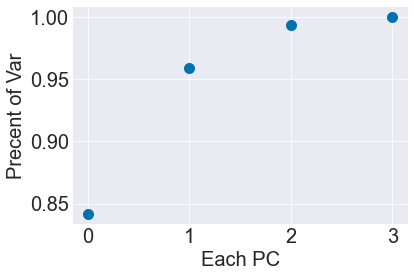

In [9]:
# test elbow plot
pca.elbow_plot()
plt.show()

**Question 1:** Based on the Iris elbow plot, how many principle components would you drop. Why?

**Question 1 answer:** 
I would drop the last two PCs becuase with the first two, we have already accounted for more than 95 percent of the variance and I dont believe the last two PCs are significant enough with them only accounting for less than 5 percent of the variance therefore I would drop them. 

#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [10]:
num_dims = 2
pcs_to_keep = np.arange(num_dims)
iris_proj = pca.pca_project(pcs_to_keep)
print(iris_proj.shape)

(150, 2)


##### Plot your PCA projected Iris data

- In the cell below, create a scatterplot of your PCA projected data.
- Label the x and y axes appropriately.

If everything goes well, you should see two distinct clusters

Text(0, 0.5, '2nd PC')

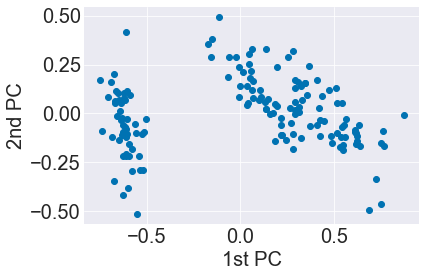

In [11]:
plt.scatter(iris_proj[:, 0], iris_proj[:, 1])
plt.xlabel("1st PC")
plt.ylabel('2nd PC')

### 1c) Dropping different pairs of principal components

- In the cell below, create a "high quality" 2x2 subplots grid of scatterplots that drops different consective PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legiable.

Text(0, 0.5, 'PC 1')

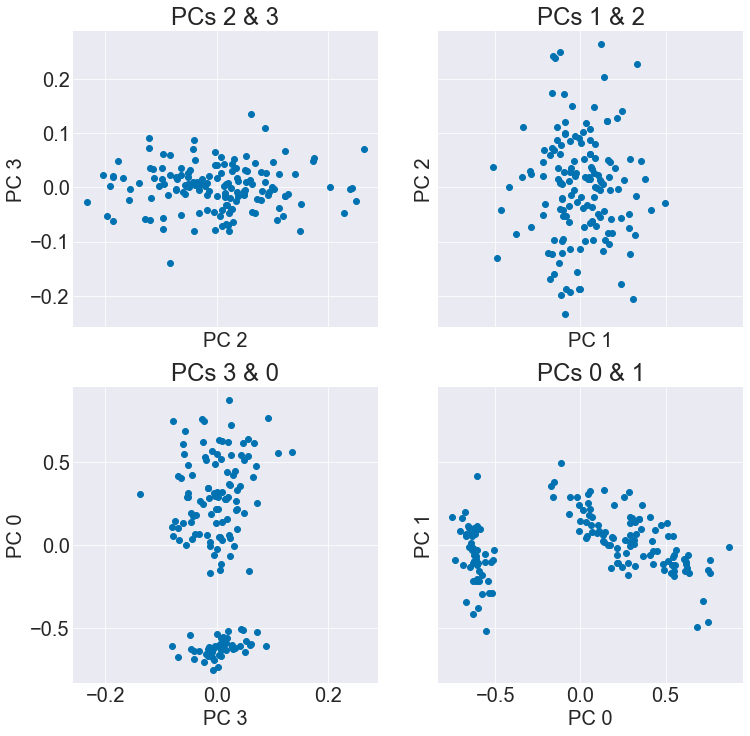

In [12]:
top_left = pca.pca_project([2,3])
top_right = pca.pca_project([1,2])
bottom_left = pca.pca_project([3,0])
bottom_right = pca.pca_project([0,1])


fig, axis = plt.subplots(2,2, sharex='col', sharey='row', figsize = (12,12))
axis[0,0].plot(top_left[:,0], top_left[:, 1], 'o')
axis[0,0].set_title("PCs 2 & 3")
axis[0,0].set_xlabel("PC 2")
axis[0,0].set_ylabel("PC 3")

axis[0,1].plot(top_right[:,0], top_right[:, 1], 'o')
axis[0,1].set_title("PCs 1 & 2")
axis[0,1].set_xlabel("PC 1")
axis[0,1].set_ylabel("PC 2")

axis[1,0].plot(bottom_left[:,0], bottom_left[:, 1], 'o')
axis[1,0].set_title("PCs 3 & 0")
axis[1,0].set_xlabel("PC 3")
axis[1,0].set_ylabel("PC 0")

axis[1,1].plot(bottom_right[:,0], bottom_right[:, 1], 'o')
axis[1,1].set_title("PCs 0 & 1")
axis[1,1].set_xlabel("PC 0")
axis[1,1].set_ylabel("PC 1")



**Question 2:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Question 2 answer:** 

From the plots we see that the PCs plot between PC 0 and 1 and 3 and 0 show distanct clusters. this tells us that each PC is unrelated to eachother and accounts for alot of the variance relatitve to the other. On the other hand the plots between PCs 1 and 2  and 2 and 3 show no distinct clusters and are all concenrated at one area. this tells us that the PC are related to eachother and thier account for variance is small relative to eachother. Therefore, from the plots we should keep PC 0 and 1.   

### 1e) Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables `sepalLength` (x), `sepalWidth` (y) of the Iris data **without any normalization**.
- In the 2nd cell below, do PCA **on the normalized Iris data** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepalLength`, `sepalWidth` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
    - If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your 'sepalLength', 'sepalWidth' plot created one cell above — including the data range and center).

Text(0, 0.5, 'sepalWidth')

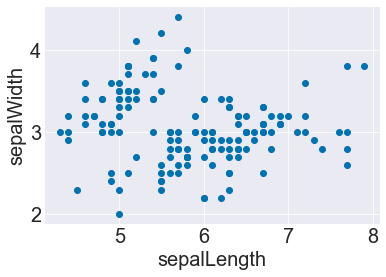

In [13]:
# Plot original iris data
ir = pd.read_csv("data/iris.csv")
pp = pca_cov.PCA_COV(ir)
plt.scatter(ir["sepalLength"], ir["sepalWidth"])
plt.xlabel("sepalLength")
plt.ylabel("sepalWidth")


Text(0, 0.5, 'sepalLength')

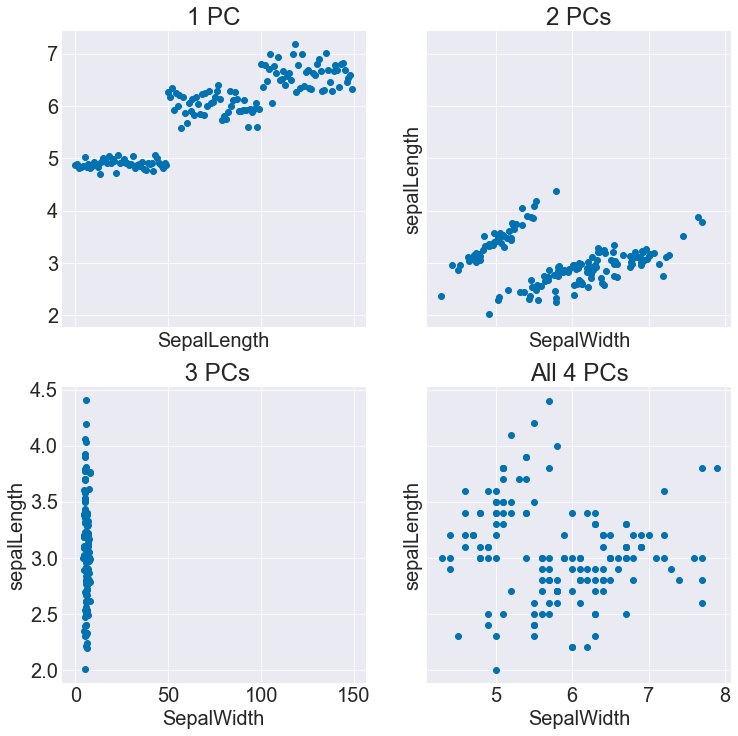

In [14]:
# 2x2 grid of scatter plots
ir_headers = list(ir.columns[:-1])
pp.pca(ir_headers, normalize=True)

top_left = pp.pca_then_project_back(1)
top_right = pp.pca_then_project_back(2)
bottom_left = pp.pca_then_project_back(3)
bottom_right = pp.pca_then_project_back(4)


fig, axis = plt.subplots(2,2, sharex='col', sharey='row', figsize = (12,12))
axis[0,0].plot(top_left[:,0], 'o')
axis[0,0].set_title("1 PC")
axis[0,0].set_xlabel("SepalLength")


axis[0,1].plot(top_right[:,0], top_right[:, 1], 'o')
axis[0,1].set_title("2 PCs")
axis[0,1].set_xlabel("SepalWidth")
axis[0,1].set_ylabel("sepalLength")

axis[1,0].plot(bottom_left[:,0], bottom_left[:, 1], 'o')
axis[1,0].set_title(" 3 PCs")
axis[1,0].set_xlabel("SepalWidth")
axis[1,0].set_ylabel("sepalLength")

axis[1,1].plot(bottom_right[:,0], bottom_right[:, 1], 'o')
axis[1,1].set_title("All 4 PCs")
axis[1,1].set_xlabel("SepalWidth")
axis[1,1].set_ylabel("sepalLength")



**Question 3:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Question 3 answer:** 

The first PCa perserves most of the variance and as seen when combined with the 2nd PC we that the second graph is very simiar to the last graph with all the PCs. This shows that we can get most of the trends just by looking at the first 2 Pcs. the third Pc combines both of the features and thats why we see the straight line and when we add the 4th and last PC we get the dimension that seprates the data points from that line back. therefore, we get our orginal data back. 

## Task 2: Eigenfaces. Perform PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 2a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [2]:
face_imgs = np.load('data/lfwcrop.npy')
face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\n')

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 2b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

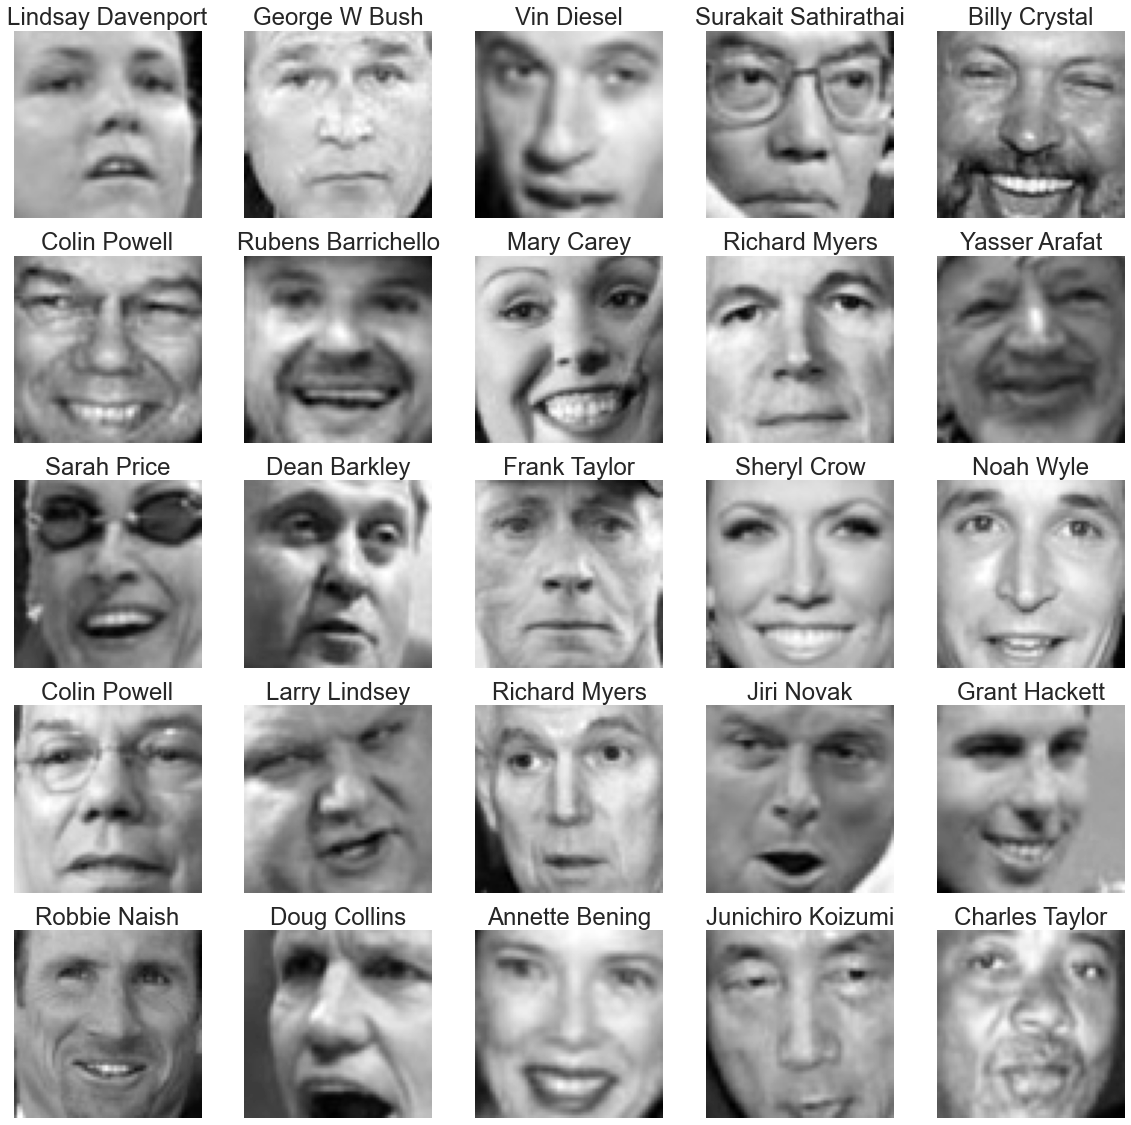

In [17]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''

    fig, ax = plt.subplots(5,5, figsize= (20,20))
    y = 0
    for i in range(5):
        for x in range(5):
            ax[i,x].imshow(np.squeeze(face_imgs[y, :, :]), cmap=plt.get_cmap('gray'))
            ax[i,x].set_title(face_names[y])
            ax[i,x].set_xticks([])
            ax[i,x].set_yticks([])
            y+=1
    
face_plot(face_imgs, face_names)


### 2c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

([], [])

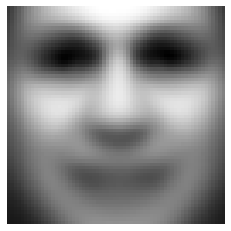

In [15]:
mean = np.mean(np.squeeze(face_imgs), axis=0)

plt.imshow(mean,  cmap=plt.get_cmap('gray'))
plt.xticks([])
plt.yticks([])

**Question 4:** What does the "mean face" image represent?

**Question 4 answer:** 

It represents the mean color intensity of each pixel at that location across all the images. for example, around the eyes we see it is very dark and that makes sense since in all the images around that area are where the eyes are located and are displayed using a high number therefore the mean is going to be high. 

### 2d) Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [19]:
# Your reshape code here

c = face_imgs.shape[2] * face_imgs.shape[1]
face_imgs_vec = np.reshape(face_imgs, (face_imgs.shape[0], c))

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 2e) Perform PCA on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_COV` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [20]:
df = pd.DataFrame(face_imgs_vec)

pca = pca_cov.PCA_COV(df)


In [21]:
import time

start = time.time()

pca.pca(np.arange(0,4096,1))
end = time.time() - start
print(end)


33.38980412483215


### 2f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

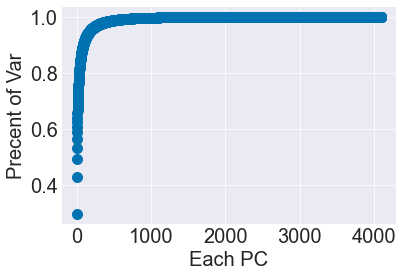

In [22]:
pca.elbow_plot()

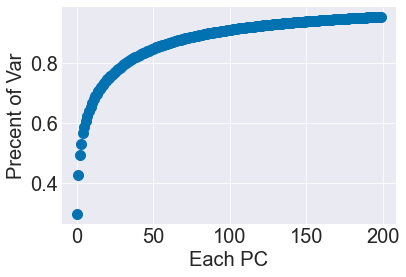

In [124]:
pca.elbow_plot(200)

### 2g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.
- Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
- Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [47]:
five = pca.pca_then_project_back(4)

seven = pca.pca_then_project_back(16)

eight = pca.pca_then_project_back(31)

nine = pca.pca_then_project_back(250)

In [48]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    import math
    c = reconstucted_imgs.shape[1] + 1
    s = int(math.sqrt(c))
 

    return np.reshape(reconstucted_imgs, (reconstucted_imgs.shape[0], s, s) )

#### 50% variance face grid

4097
64


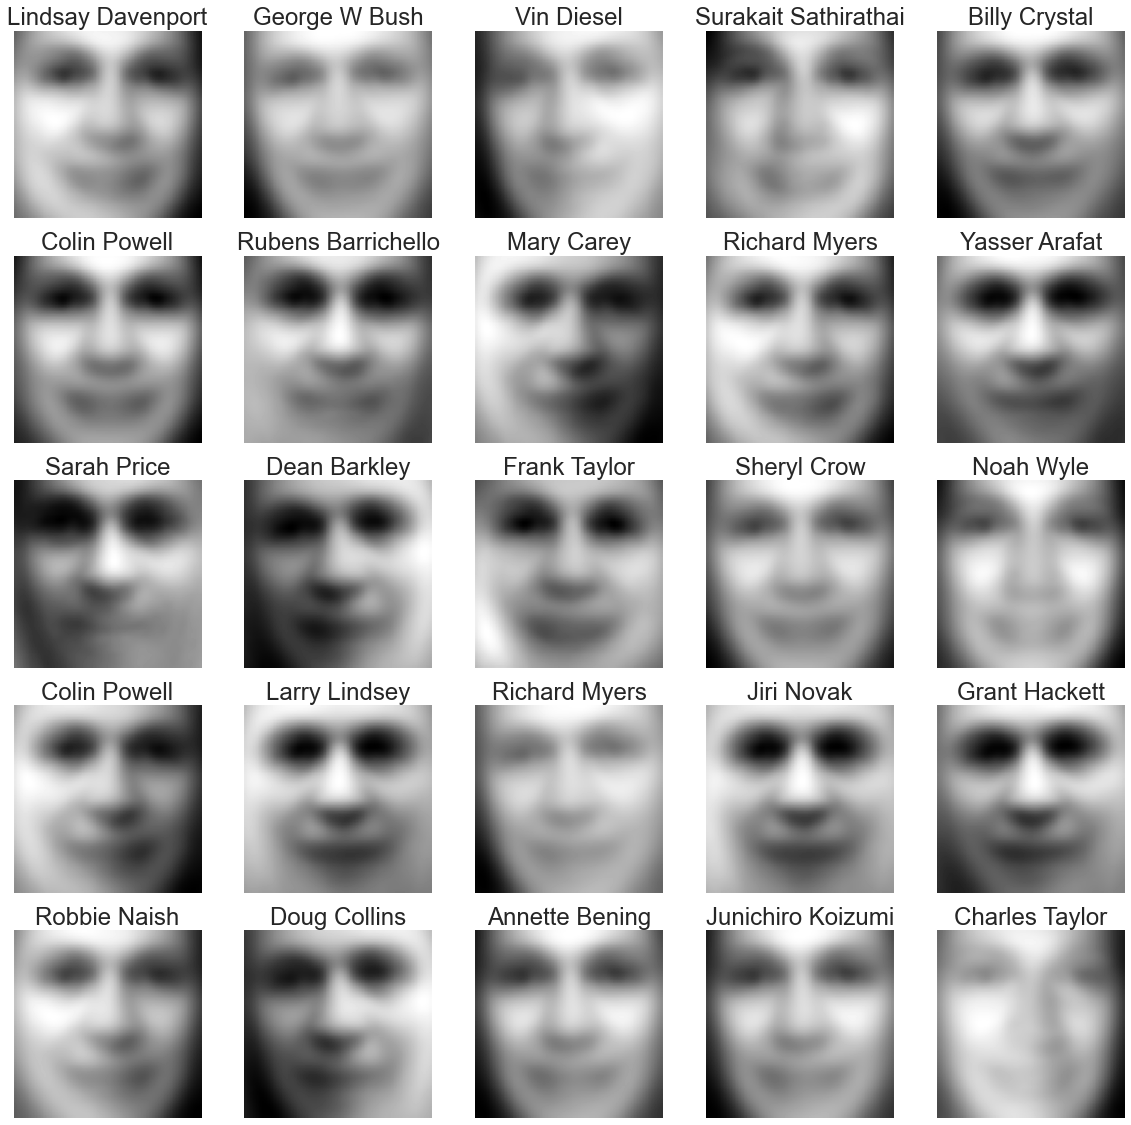

In [50]:
face_plot(make_imgs(five), face_names)

#### 70% variance face grid

4097
64


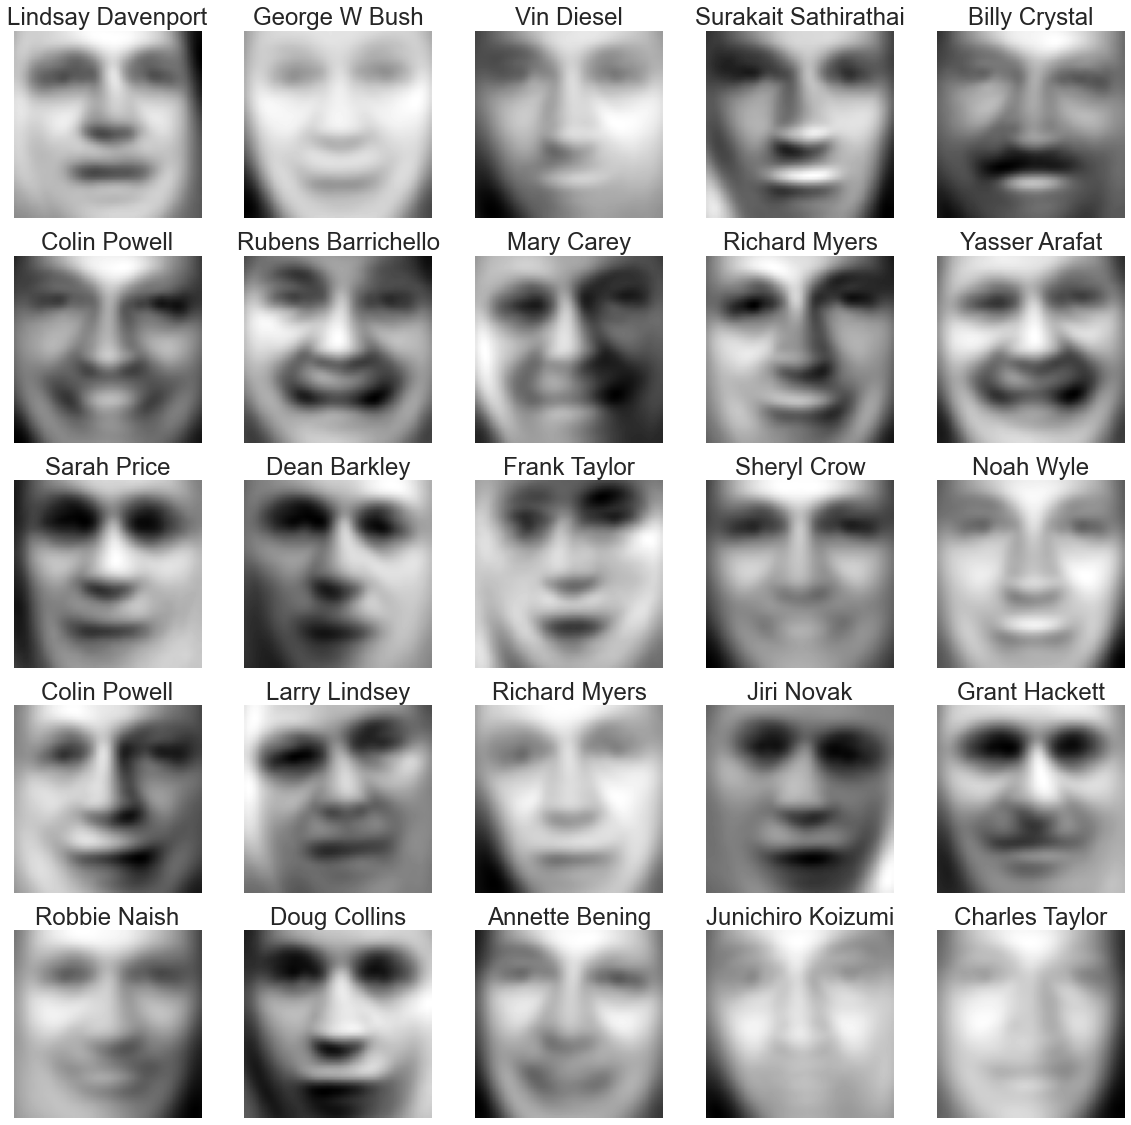

In [52]:
face_plot(make_imgs(seven), face_names)

#### 80% variance face grid

4097
64


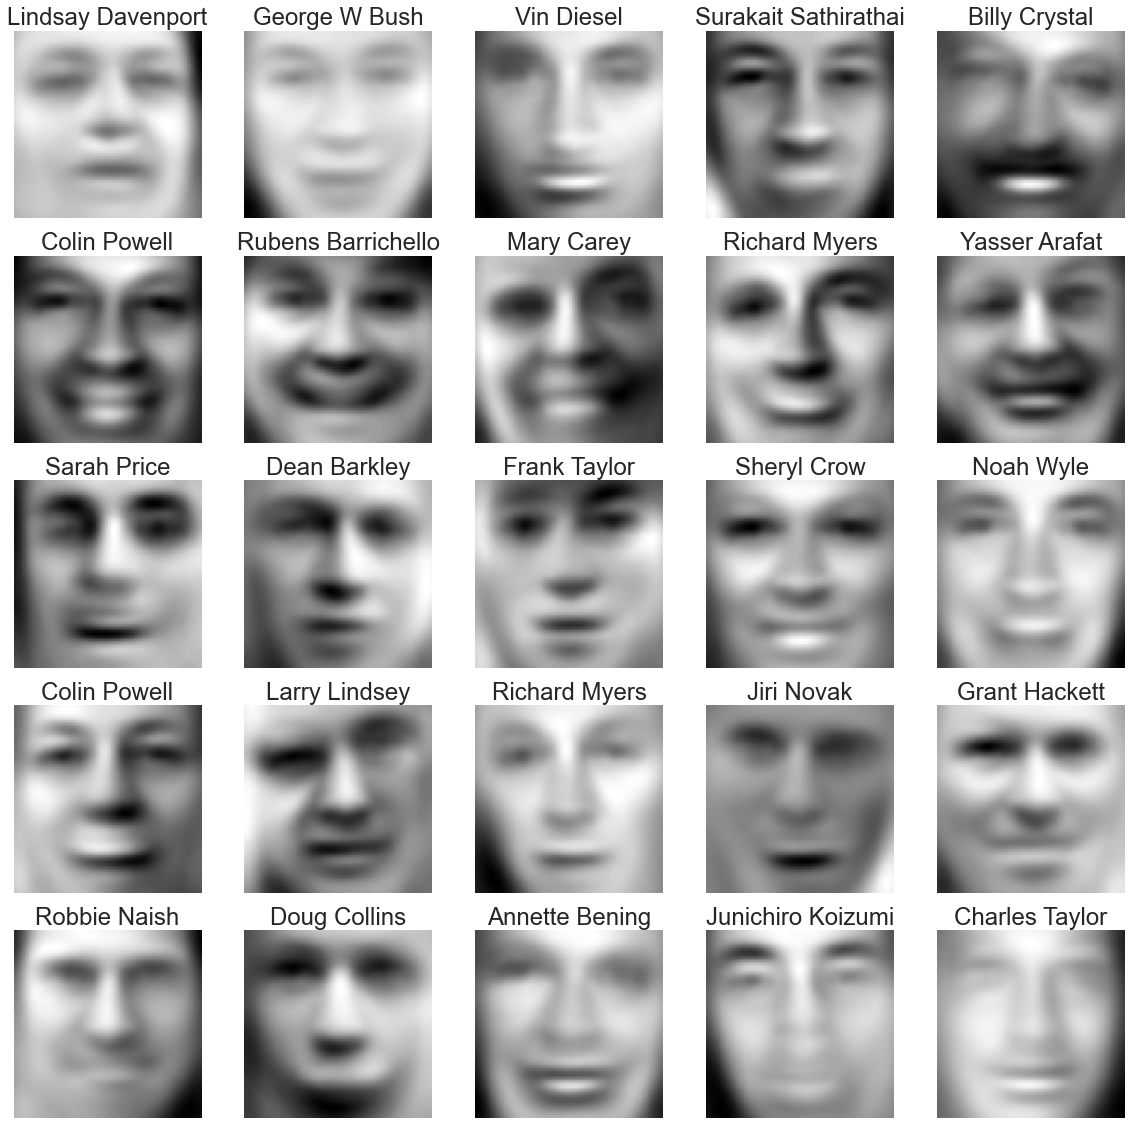

In [53]:
face_plot(make_imgs(eight), face_names)

#### 95% variance face grid

4097
64


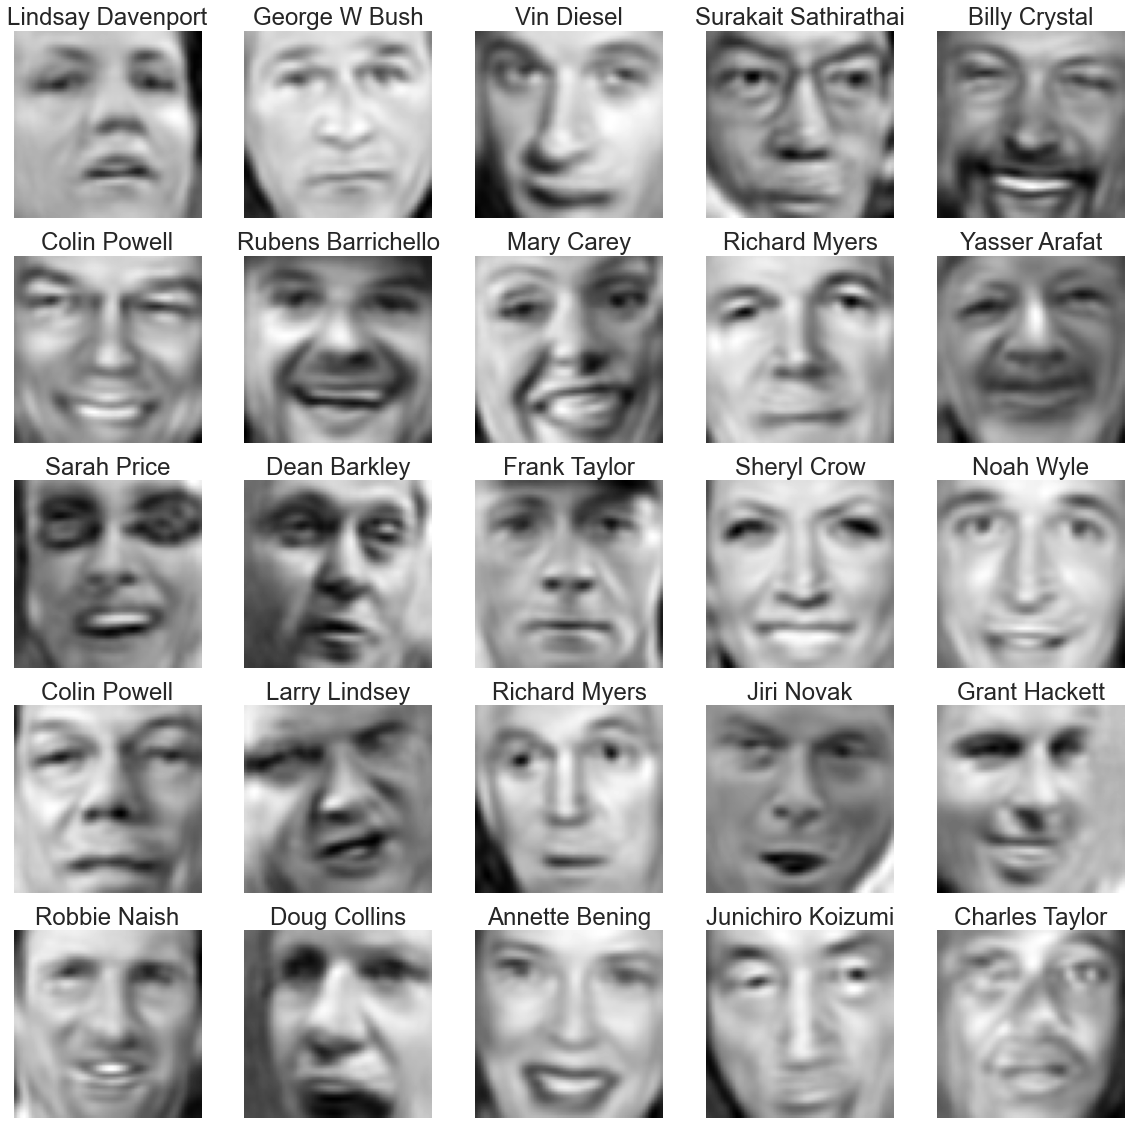

In [54]:
face_plot(make_imgs(nine), face_names)

**Question 5:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Question 5 answer:** 
in order to retain 50% of the variance it only took the first 4 eigen vectors and looking at the pairplot one is still unable to recongize the face of each person. In order to retain 70% of the variance it took around 16 eigenvectors and at this point the facial features are becoming more clear, however, it is still pretty hard to recongize the face. In order to retain 80% of the variance it took around 31 eigen vectors and looking at the pairplot it becomes much clearer and one is able to determine the sex of each person as well as make an educated guess on who the person might be. in order to retain 95% of the variance it took around 250 eigen vectors. I played it safe and went with 250 but I'm sure you can use less. At this point each picture is easily recongized and the reconstructed pairplot is very similar to the orginial pairplot. Therefore we were able to reduce to the dimensionality from 4096 to 250 and still get a good/great representation of the data. 

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, etc) to inform your analysis and exploration. 

In [29]:
fifa = pd.read_csv("data/fifa.csv")

sub_fifa = fifa[['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes' ]]

rr = sub_fifa.replace([np.inf, -np.inf], np.nan).dropna()
print(rr.shape)
print(rr.head())

(18159, 34)
   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     86.0       97.0   
1      84.0       94.0             89.0          81.0     87.0       88.0   
2      79.0       87.0             62.0          84.0     84.0       96.0   
3      17.0       13.0             21.0          50.0     13.0       18.0   
4      93.0       82.0             55.0          92.0     82.0       86.0   

   Curve  FKAccuracy  LongPassing  BallControl  ...  Penalties  Composure  \
0   93.0        94.0         87.0         96.0  ...       75.0       96.0   
1   81.0        76.0         77.0         94.0  ...       85.0       95.0   
2   88.0        87.0         78.0         95.0  ...       81.0       94.0   
3   21.0        19.0         51.0         42.0  ...       40.0       68.0   
4   85.0        83.0         91.0         91.0  ...       79.0       88.0   

   Marking  StandingTackle  SlidingTackle  GKDiving  GKHandlin

In [20]:
pca_fifa = pca_cov.PCA_COV(rr)
fifa_headers = list(rr.columns[:])

pca_fifa.pca(fifa_headers, True)

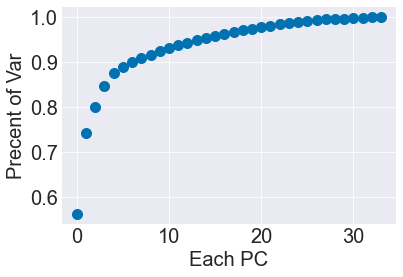

In [21]:
pca_fifa.elbow_plot()

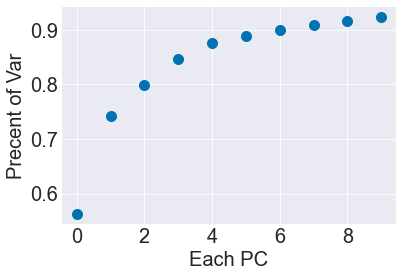

In [22]:
pca_fifa.elbow_plot(10)

In [28]:
ar = pca_fifa.pca_project(np.arange(0,10,1))


In this extension, I ran my PCA on a large data set of fifa players. the data set can be found here https://www.fifaindex.com/players/fifa19/. I used only the last 34 features as they were all numbers and described how good a player is in certain things such as finishing and drippling. I run PCA with normilzation the data becuase the range of each feature varies alot and I didn't want that to skew my analysis. After running the PCA two elblow plots were displayed one with all the e_vecs and one with the top 10. From the e_vecs it can be determined that most of the variance can be described by the first ten e_vecs therefore those were the e_vecs I projected. I tried to plot the result but there are sooo much data pionts that the graph is unreadable. however, from this anaylsis we can concluded we can get a pretty good description of a player and there overwell soccer skill just ten features instead of the 34 features we had in the beginning.

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

### 3. Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.

In this extension, I used pca to create an eigenspace and used that space inorder to perform facial recognition using a query image. The data used can be found on https://www.kaggle.com/kasikrit/att-database-of-faces/download. I also used https://machinelearningmastery.com/face-recognition-using-principal-component-analysis/ as a guide for my work. 

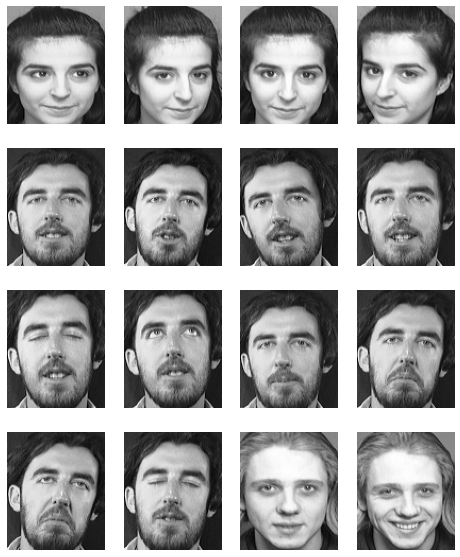

In [4]:
import zipfile
from sklearn.decomposition import PCA
import cv2

# open the zip file and stores the data for each person in a dictionary
faces = {}
with zipfile.ZipFile("face.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue 
        with facezip.open(filename) as image:

            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)


# ceates a subplot showing the first 16 images
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
list1 = []

for i in faces.values():
    list1.append(i)

faceimages =list1[16:] 
q = 0
for z in range(4):
    for w in range(4):
        axes[z][w].imshow(faceimages[q], cmap="gray")
        axes[z][w].set_xticks([])
        axes[z][w].set_yticks([])
        q+=1
    
plt.show()



In the above cell I read in the data and showed a 4X4 subplot showing the first 16 images

In [61]:

faceshape = list(faces.values())[0].shape
print(faceshape)
person = set(filename.split("/")[0] for filename in faces.keys())

facematrix = []
facelabel = []

# goes over the dictionary and adds each persons data to a list and each person's label to another list at the same index
# we excluded person 's10/' in order to test what would be the closest image we could find for that person from our database
# we also excluded image 10 from person s37 in order to see would we be able to find that same person from the other images we have of them
for key,val in faces.items():
    if key.startswith("s10/"):
        continue 
    if key == "s37/10.pgm":
        continue 
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])
 
# takes the data and puts it in a data frame
data_df = pd.DataFrame(facematrix)
facematrix = np.array(facematrix)
r = PCA().fit(facematrix)


print(data_df.shape)



(112, 92)
(389, 10304)


In the above cell I created two lists one to hold the label of the images and one for the data. I excluded image 10 from "s37" and all of "s10"

In [21]:
# runs pca on the dataframe
pca2 = pca_cov.PCA_COV(data_df)
pca2.pca(np.arange(0,10304,1))

In the above cell I ran PCA on the data. My PCA runs without giving an error but takes about 6 minutes to run. However, the e_vecs  that it returns are somwhow complex and I believe it has to do something with how np.linarg.eig() computes the e_vects noneless I used the scipy's PCA and I was able to get the right e_vects.

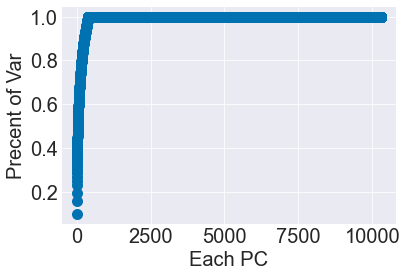

In [25]:
pca2.elbow_plot();

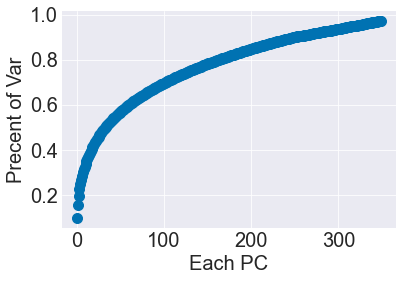

In [24]:
pca2.elbow_plot(350);

the above plots show the eblow plots for all the e vects and the elbow plot for the first 350  e_vects

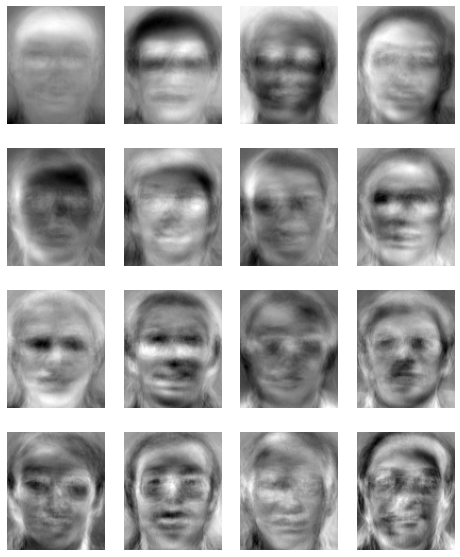

In [73]:
pca2.e_vecs = r.components_[:50]
pca2.mean = r.mean_
eigenfaces = pca2.e_vecs

# creates a subplot showing 16 of our images using 50 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
t =0
for i in range(4):
    for s in range(4):

        axes[i][s].imshow(eigenfaces[t].reshape(faceshape), cmap="gray")
        axes[i][s].set_xticks([])
        axes[i][s].set_yticks([])
        t+= 1
plt.show()

In the above plot created an eigenspace using the first 50 e_vects and reconstructed the first 16 images using those that space. As you can see the images are not as clear as in the beginning becuase they have lost some of their data. However, they still contain a signficant amount since the first 50 e_vects contained alot of the variance. therefore, we can still see the image of a face but the facial features are distorted

In [63]:
weights = eigenfaces @ (facematrix - pca2.mean).T

in the above cell I calculated the weights

Best match s37 with Euclidean distance 1046.041668


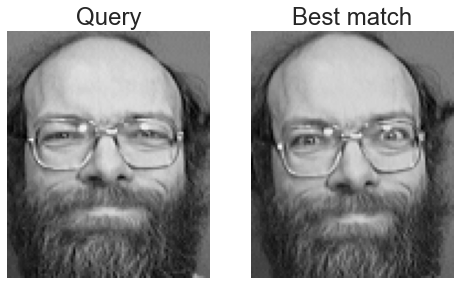

In [71]:

query = faces["s37/10.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca2.mean).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))


fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
axes[1].set_xticks([])
axes[1].set_yticks([])
plt.show()

In the above cell I used the image that I left out of my database to see if, I would be able to find its closest fit and if that would be the same person. As seen from above I was to recognize the query image and find its best fit which as expected is another image of the same person. The Euclidean distance id about 1046 which is not bad; therefore we were able to correctly match the query image to the person and determine image in our query is a person we should allow access to whatever our facial recognition is protecting

Best match s23 with Euclidean distance 3801.473326


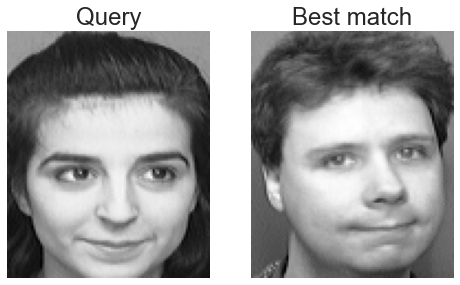

In [72]:
query = faces["s10/6.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca2.mean).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))


fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
axes[1].set_xticks([])
axes[1].set_yticks([])
plt.show()

In the above cell, I used an image of a person that I didnt have any data on in my data base to see what the best match would be. As expected the match isn't great since that person isn't in our data base. noneless the best match is person s23 and this gives us an Euclidean distance of about 3801 which is much bigger than the distace we got above; therefore we can reject this best match and determine the image in our query is not a person we should allow access to whatever out facial recognition is protecting. 